# Лабораторная работа №3
## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей 

## Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
3. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
4. Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
5. Сравните метрики качества исходной и оптимальной моделей.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold

В качестве датасета выберем набор данных сна за месяц

In [2]:
df = pd.read_csv("C:\\Users\\adolf\\Downloads\\Sleep_data.csv")

In [3]:
#Удаление строк, содержащих пустые значения
df = df.dropna()
df.head()

,DECEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Wednesday,12/01/2021,91.0,7:33:00,23.00%,19.00%,98.00%,10:56pm - 7:20am
2,Thursday,12/02/2021,81.0,7:17:00,16.00%,13.00%,94.00%,10:45pm - 6:58am
3,Friday,12/03/2021,80.0,7:17:00,15.00%,17.00%,78.00%,10:51pm - 7:02am
4,Saturday,12/04/2021,85.0,8:23:00,20.00%,15.00%,58.00%,9:53pm - 7:17am
5,Sunday,12/05/2021,82.0,7:19:00,20.00%,12.00%,79.00%,11:54pm - 8:16am


In [4]:
df.shape

(31, 8)

### Обучающая и тестовая выборка
- В качестве обучающей выборки будем использовать время в часах и минутах
- В качестве целевого признака будет выступать оценка качества сна
- Алгоритм KNN будет решать задачу регрессии

In [5]:
df["HOURS OF SLEEP"]

1     7:33:00
2     7:17:00
3     7:17:00
4     8:23:00
5     7:19:00
6     7:18:00
7     8:02:00
8     6:47:00
9     7:32:00
10    7:45:00
11    7:57:00
12    6:47:00
13    8:33:00
14    7:33:00
15    7:08:00
16    6:34:00
17    7:18:00
18    8:14:00
19    7:08:00
20    7:06:00
21    8:26:00
22    7:29:00
23    8:37:00
24    9:03:00
25    6:39:00
26    7:51:00
27    7:06:00
28    6:57:00
29    7:23:00
30    7:48:00
31    8:09:00
Name: HOURS OF SLEEP, dtype: object

In [6]:
#Преобразование в удобный формат
hours = []
minutes = []
for item in df["HOURS OF SLEEP"]:
    hours.append(int(item[0]))
    minutes.append(int(item[2:4]))
myData = pd.DataFrame({"h": hours, "m": minutes, "score": df["SLEEP SCORE"]})
myData

,h,m,score
1,7,33,91.0
2,7,17,81.0
3,7,17,80.0
4,8,23,85.0
5,7,19,82.0
6,7,18,80.0
7,8,2,89.0
8,6,47,85.0
9,7,32,85.0
10,7,45,87.0


In [7]:
#С помощью метода train_test_split разделим выборку на обучающую и тестовую
data= np.array([[myData["h"].iloc[i], myData["m"].iloc[i]] for i in range(myData.shape[0])])
target= np.array(myData["score"])
trainX, testX, trainY, testY = train_test_split(data, target, train_size=0.9, random_state=1)

In [8]:
#Обучение модели с гиперпараметром 3
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(trainX, trainY)
pred3_1 = neigh.predict(testX)
pred3_2 = neigh.predict(trainX)
pred3_1 = [i for  i in pred3_1]
pred3_2 = [i for  i in pred3_2]

In [9]:
#Обучение модели с гиперпараметром 10
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(trainX, trainY)
pred10_1 = neigh.predict(testX)
pred10_2 = neigh.predict(trainX)
pred10_1 = [i for  i in pred10_1]
pred10_2 = [i for  i in pred10_2]

In [10]:
print("Истинные значения:")
for i in testY:
    print(i)

Истинные значения:
85.0
85.0
85.0
78.0


In [11]:
print("Предсказания с гиперпараметром 3:")
for i in pred3_1:
    print(i)

Предсказания с гиперпараметром 3:
85.33333333333333
88.0
81.66666666666667
85.0


In [12]:
print("Предсказания с гиперпараметром 10:")
for i in pred10_1:
    print(i)

Предсказания с гиперпараметром 10:
83.4
84.9
83.5
83.5


## Проверим качество модели с помощью метрик регрессии

### Метрика Root mean squared error (RMSE)

In [13]:
myrmse3_1 = mean_squared_error(testY, pred3_1, squared=False)
myrmse3_2 = mean_squared_error(trainY, pred3_2, squared=False)
print("Для К=3:\t {}\t{}".format(myrmse3_2, myrmse3_1))

Для К=3:	 3.8522079607466035	4.1599946581162275


In [14]:
myrmse10_1 = mean_squared_error(testY, pred10_1, squared=False)
myrmse10_2 = mean_squared_error(trainY, pred10_2, squared=False)
print("Для К=10:\t {}\t{}".format(myrmse10_2, myrmse10_1))

Для К=10:	 4.696925708493918	2.960996453898585


In [15]:
#Запоминаем результаты
rmse = []
rmse.append(myrmse10_2)
rmse.append(myrmse10_1)

### Коэффициент детерминации

In [16]:
r2_1 = r2_score(testY,pred3_1)
r2_2 = r2_score(trainY,pred3_2)
print("Для К=3:\t {}\t{}".format(r2_1, r2_2))

Для К=3:	 -0.8835978835978826	0.3393991206643868


In [17]:
r2_1 = r2_score(testY,pred10_1)
r2_2 = r2_score(trainY,pred10_2)
print("Для К=10:\t {}\t{}".format(r2_1, r2_2))

Для К=10:	 0.04571428571428626	0.017919516365413557


## Подбор гиперпараметра с помощью кросс-валидации
Найдём наилучший гиперпараметр используя текущую перестановку

KFold()

In [18]:
kf = KFold(n_splits=10)
r = np.array(range(1,24))
params = [{"n_neighbors": r}]
gs= GridSearchCV(KNeighborsRegressor(), params, cv=kf, scoring="neg_root_mean_squared_error")
gs.fit(trainX, trainY)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])}],
             scoring='neg_root_mean_squared_error')

Text(0.5, 1.0, 'Гиперпараметр при KFold()')

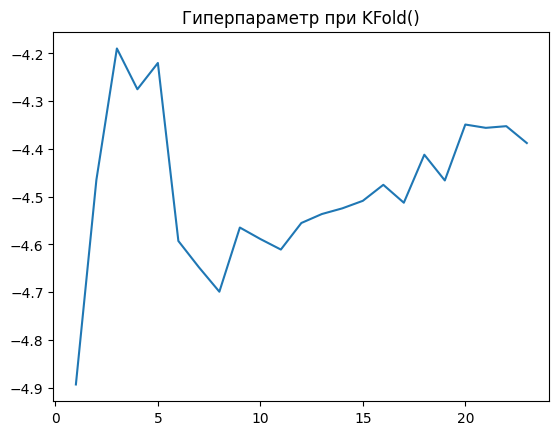

In [19]:
plt.plot(r, gs.cv_results_['mean_test_score'])
plt.title("Гиперпараметр при KFold()")

In [20]:
#Предсказание резульатов на тестовой и обучающей выборках
gs.best_estimator_.fit(trainX, trainY)
predGs1 = gs.best_estimator_.predict(testX)
predGs2 = gs.best_estimator_.predict(trainX)

In [21]:
#Оценка качества с помощью RMSE
rmse.append(mean_squared_error(testY, predGs1, squared=False))
rmse.append(mean_squared_error(trainY, predGs2, squared=False))
(mean_squared_error(testY, predGs1, squared=False), mean_squared_error(trainY, predGs2, squared=False))

(4.1599946581162275, 3.8522079607466035)

RepeatedKFold()

In [22]:
kf = RepeatedKFold(n_splits=10, n_repeats = 3)
r = np.array(range(1,24))
params = [{"n_neighbors": r}]
gs2= GridSearchCV(KNeighborsRegressor(), params, cv=kf, scoring="neg_root_mean_squared_error")
gs2.fit(trainX, trainY)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])}],
             scoring='neg_root_mean_squared_error')

Text(0.5, 1.0, 'Гиперпараметр при RepeatedKFold()')

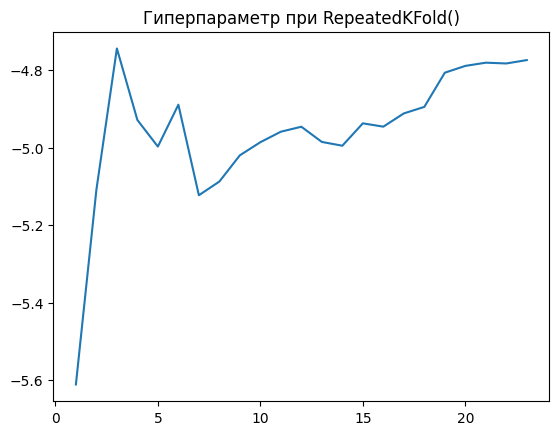

In [23]:
plt.plot(r, gs2.cv_results_['mean_test_score'])
plt.title("Гиперпараметр при RepeatedKFold()")

In [24]:
#Предсказание резульатов на тестовой и обучающей выборках
gs2.best_estimator_.fit(trainX, trainY)
predGs1 = gs2.best_estimator_.predict(testX)
predGs2 = gs2.best_estimator_.predict(trainX)

In [25]:
#Оценка качества с помощью RMSE
rmse.append(mean_squared_error(testY, predGs1, squared=False))
rmse.append(mean_squared_error(trainY, predGs2, squared=False))
(mean_squared_error(testY, predGs1, squared=False), mean_squared_error(trainY, predGs2, squared=False))

(4.1599946581162275, 3.8522079607466035)

### Сравним метрики качества исходной и оптимальных моделей

In [26]:
X = [i for i in range(len(rmse)//2)]
testRMSE = []
trainRMSE = []
for i in range(len(rmse)):
   if i%2==0:
        trainRMSE.append(rmse[i])
   else:
        testRMSE.append(rmse[i])

<Axes: title={'center': 'Сравнение предсказания тестовой выборки'}, xlabel='Marks', ylabel='RMSE'>

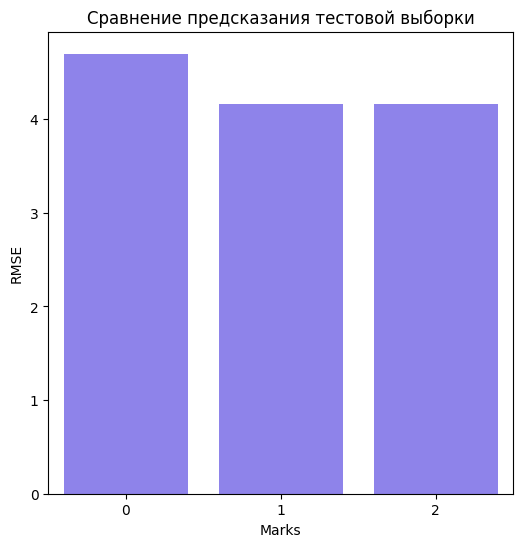

In [27]:
dataframe = pd.DataFrame({"Marks": X, "RMSE": trainRMSE})
fig, ax = plt.subplots(figsize=(6,6)) 
ax.title.set_text("Сравнение предсказания тестовой выборки")
sns.barplot(data=dataframe, y="RMSE", x="Marks", color="#8172fb")

<Axes: title={'center': 'Сравнение предсказания обучающей выборки'}, xlabel='Marks', ylabel='RMSE'>

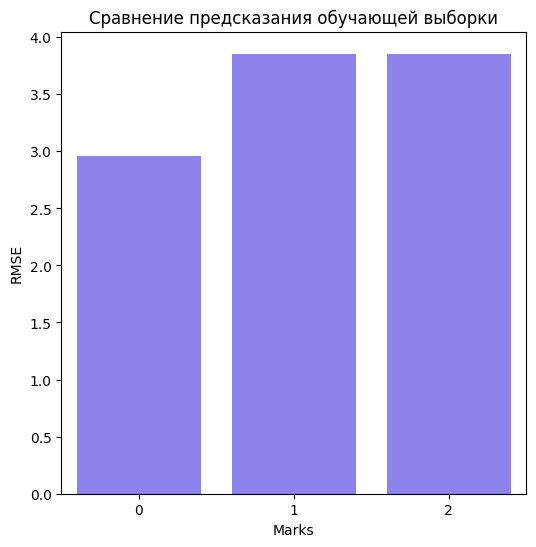

In [28]:
dataframe = pd.DataFrame({"Marks": X, "RMSE": testRMSE})
fig, ax = plt.subplots(figsize=(6,6)) 
ax.title.set_text("Сравнение предсказания обучающей выборки")
sns.barplot(data=dataframe, y="RMSE", x="Marks", color="#8172fb")